## Question 1

In [1]:
import numpy as np
from numpy.linalg import svd, pinv

A = np.array([[1, 2, 3],
              [4, 5, 6]])

# Part (a)
U, sigma, VT = svd(A, full_matrices=True)

# Since we want a full non-reduced SVD, we need to form the Sigma matrix with the appropriate dimensions
Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:min(A.shape), :min(A.shape)] = np.diag(sigma)
print('SVD =',Sigma)

SVD = [[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]]


In [2]:
# Part (b)
A_pinv = pinv(A)
print('Pseudoinverse =', A_pinv)


Pseudoinverse = [[-0.94444444  0.44444444]
 [-0.11111111  0.11111111]
 [ 0.72222222 -0.22222222]]


In [3]:
# Part (c)
# For a rank-1 approximation, we can take the first singular value and the corresponding singular vectors
sigma1 = sigma[0]
U1 = U[:, 0].reshape(-1, 1)
VT1 = VT[0, :].reshape(1, -1)
A1 = sigma1 * U1 @ VT1

print('rank-1 matrix A1 that minimizes ||A - A1||_F =',A1)

rank-1 matrix A1 that minimizes ||A - A1||_F = [[1.57454629 2.08011388 2.58568148]
 [3.75936076 4.96644562 6.17353048]]


## Question 2

In [4]:
import numpy as np
from numpy import linalg 
from matplotlib import cm
from matplotlib import pyplot as plt

y = np.linspace(-2,2,401) # spatial coordinate
Ny = np.size(y)

amp1 = 1
y01 = 0.5
sigmay1 = 0.6

amp2 = 1.2
y02 = -0.5
sigmay2 = 0.3

dt = 0.1
Nt = 101
tend = dt*(Nt-1)
t = np.linspace(0,tend,Nt) # time

omega1 = 1.3
omega2 = 4.1

v1 = amp1*np.exp(-((y-y01)**2)/(2*sigmay1**2))
v2 = amp2*np.exp(-((y-y02)**2)/(2*sigmay2**2))

X = np.zeros([Ny,Nt],dtype=complex)
for tt in range(Nt):
    X[:,tt] = v1*np.cos(omega1*t[tt])+v2*np.cos(omega2*t[tt]) 

SVD of X = [[-1.36201017e-05+0.j  1.03178928e-05+0.j -7.30088255e-01+0.j ...
  -7.22912107e-03+0.j  1.34763709e-02+0.j -5.28648436e-03+0.j]
 [-1.46191027e-05+0.j  1.10042257e-05+0.j -4.01572256e-01+0.j ...
  -2.54947545e-03+0.j  1.77306195e-03+0.j -1.21242185e-02+0.j]
 [-1.56891053e-05+0.j  1.17273519e-05+0.j  4.73179399e-01+0.j ...
  -4.66885085e-04+0.j  3.03496134e-03+0.j -8.35226746e-02+0.j]
 ...
 [-3.77152329e-03+0.j  3.03885108e-03+0.j -6.19207641e-04+0.j ...
  -6.74304454e-03+0.j  2.32120672e-03+0.j  8.90835592e-04+0.j]
 [-3.61911302e-03+0.j  2.91604868e-03+0.j -1.61840393e-05+0.j ...
  -4.95431758e-03+0.j  5.23709457e-03+0.j  2.97455044e-03+0.j]
 [-3.47189723e-03+0.j  2.79743166e-03+0.j  1.86910869e-04+0.j ...
  -5.07425904e-04+0.j  1.10559431e-03+0.j -2.61889939e-04+0.j]] [7.96868223e+01 5.60152252e+01 4.37472999e-14 3.68122824e-14
 2.15261713e-14 1.71552200e-14 1.33553021e-14 7.73450826e-15
 7.73450826e-15 7.73450826e-15 7.73450826e-15 7.73450826e-15
 7.73450826e-15 7.73450826

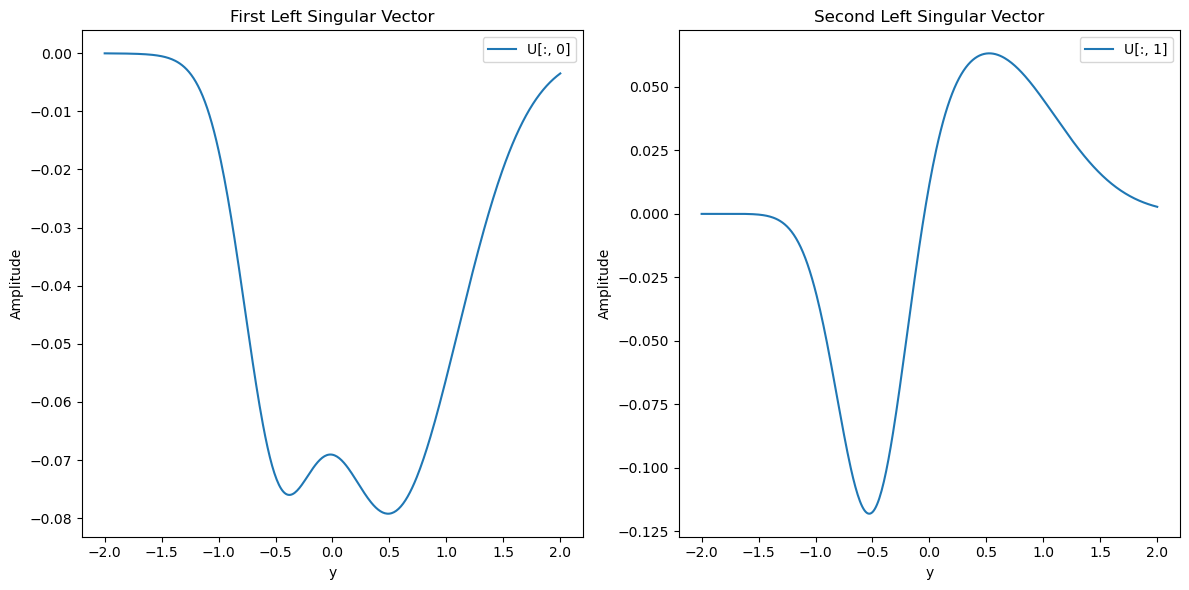

array([79.68682228, 56.0152252 ])

In [5]:
# The SVD of the matrix 'X'
U, S, Vh = linalg.svd(X, full_matrices=False)
print('SVD of X =', U, S, Vh)

# Plot is obtained as follows
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y, U[:, 0].real, label='U[:, 0]')
plt.title('First Left Singular Vector')
plt.xlabel('y')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y, U[:, 1].real, label='U[:, 1]')
plt.title('Second Left Singular Vector')
plt.xlabel('y')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

S[:2]


The first two singular values are much larger than the others because they capture the main shapes or patterns in our data. These patterns come from the two waves we created when we made the matrix. The other singular values are almost zero, meaning they don't really tell us anything important about the data's shape or structure. This is why we could use just the first two singular values and their associated patterns to get a good summary of the whole data set.

## Question 3

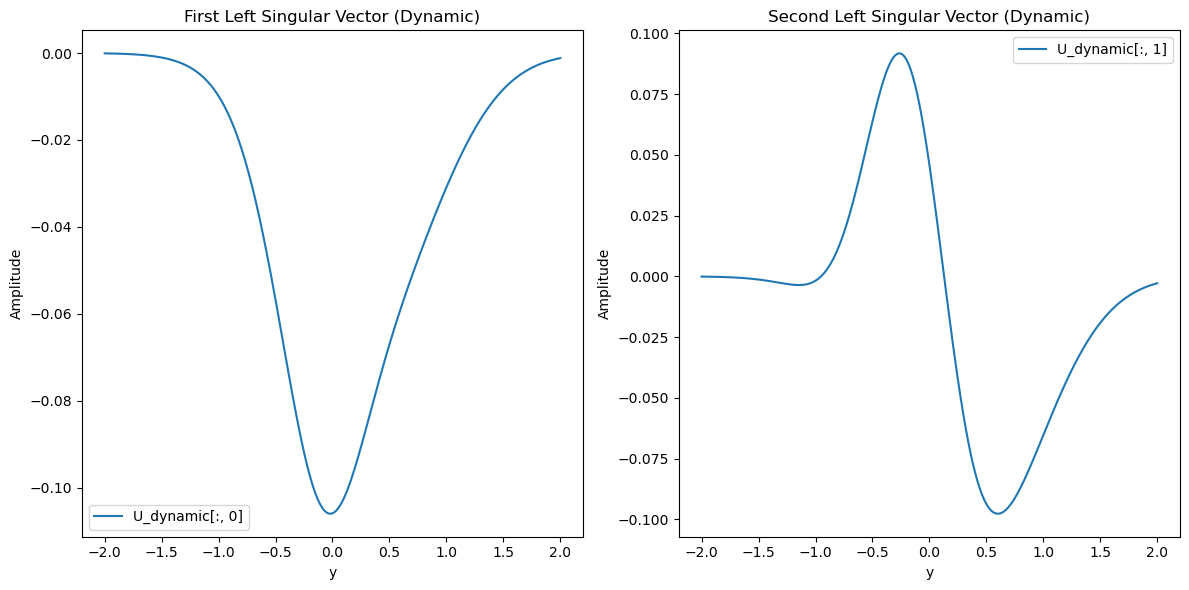

array([89.23919604, 32.77516839])

In [6]:
# The time-varying means for the Gaussian functions
def y01(t, omega=0.1, phase=np.pi):
    """ Time-varying mean for the first Gaussian. """
    return 0.5 * np.sin(omega * t + phase) + 0.5

def y02(t, omega=0.2, phase=0):
    """ Time-varying mean for the second Gaussian. """
    return 0.5 * np.sin(omega * t + phase) - 0.5

X_dynamic = np.zeros([Ny,Nt],dtype=complex)

for tt in range(Nt):
    # Updating the means of the Gaussians based on the time-varying functions
    current_y01 = y01(t[tt])
    current_y02 = y02(t[tt])

    # Recalculating the Gaussian functions with the new means
    v1_dynamic = amp1*np.exp(-((y-current_y01)**2)/(2*sigmay1**2))
    v2_dynamic = amp2*np.exp(-((y-current_y02)**2)/(2*sigmay2**2))

    # Constructing the new data matrix with the time-varying Gaussians
    X_dynamic[:,tt] = v1_dynamic*np.cos(omega1*t[tt]) + v2_dynamic*np.cos(omega2*t[tt])

# The SVD of the new data matrix 'X_dynamic'
U_dynamic, S_dynamic, Vh_dynamic = linalg.svd(X_dynamic, full_matrices=False)

# Plot is obtained as follows
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(y, U_dynamic[:, 0].real, label='U_dynamic[:, 0]')
plt.title('First Left Singular Vector (Dynamic)')
plt.xlabel('y')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(y, U_dynamic[:, 1].real, label='U_dynamic[:, 1]')
plt.title('Second Left Singular Vector (Dynamic)')
plt.xlabel('y')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

S_dynamic[:2]


We modified the function generating our data so that the Gaussian peaks move over time. The first two singular values for this dynamic data are approximately 89.24 and 32.78. These values are quite different from the static case where the peaks didn't move, indicating that the data now contains more complex patterns. The largest singular value remains significant, showing there's still a dominant feature in the data. However, the second value is smaller, suggesting that the second feature has less influence when the peaks are moving. This means that our data, with the moving peaks, has more variability and might need more than just two features to describe it fully.

#### ChatGPT Link: https://chat.openai.com/share/eb10682d-0c68-4fc7-8b7b-ce128d68eed4